# PCA

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()
label_names = wine.target_names
wine_df = pd.DataFrame(
    data=np.hstack((wine.data, wine.target.reshape(-1, 1))), 
)
wine_Y = wine.target
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


## Normalization of the data

In [3]:
normalized_wine = (wine_df - wine_df.mean()) / wine_df.std()
normalized_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,-1.210529
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,-1.210529
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,-1.210529
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,-1.210529
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,-1.210529


In [4]:
def my_PCA(dataset : pd.DataFrame, n_components=2):
  # Step 1: Standardize the dataset
  normalized_dataset = (dataset - dataset.mean()) / dataset.std()
  
  # Step 2: Calculate the covariance matrix
  covariance_matrix = np.cov(normalized_dataset.T) # transpose, because np.cov expects features in rows
  
  # Step 3: Calculate the eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
  
  # Step 4: Sort the eigenvalues and eigenvectors
  sorted_indices = np.argsort(eigenvalues)[::-1]
  sorted_eigenvalues = eigenvalues[sorted_indices]
  sorted_eigenvectors = eigenvectors[:, sorted_indices]
  
  # Step 5: Select the top n_components eigenvectors
  selected_eigenvectors = sorted_eigenvectors[:, :n_components]
  
  # Step 6: Transform the dataset
  transformed_dataset = np.dot(normalized_dataset, selected_eigenvectors)
  
  return transformed_dataset, sorted_eigenvalues

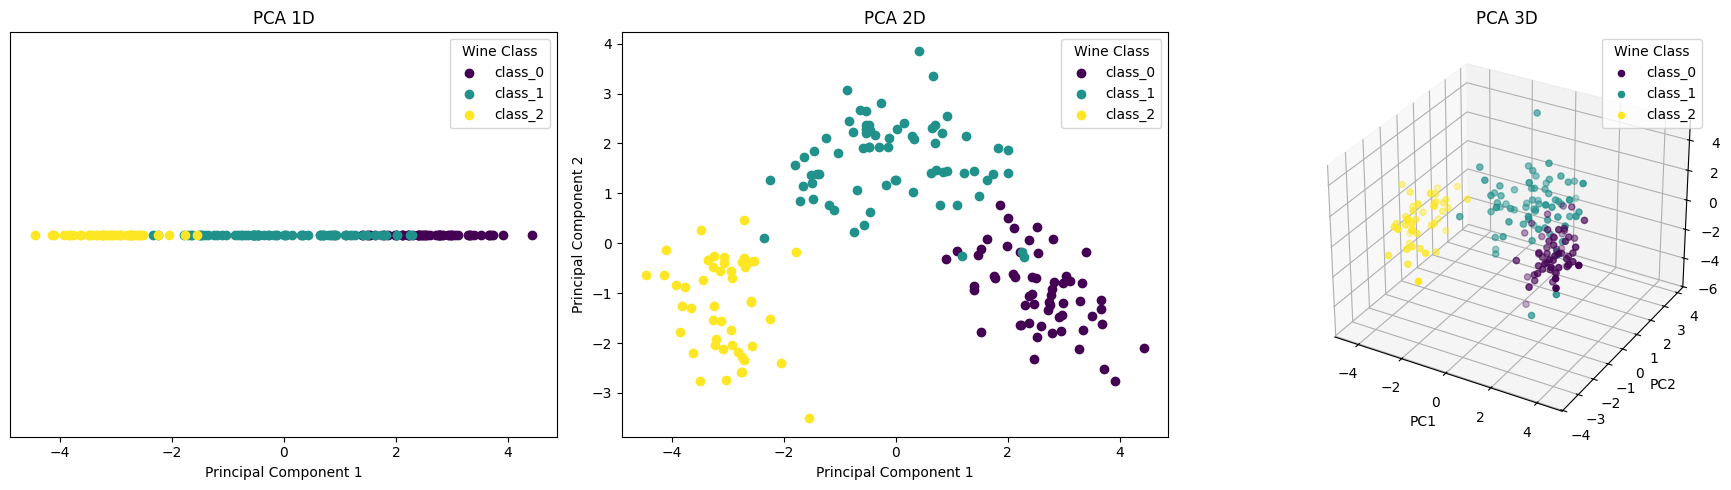

In [5]:
fig = plt.figure(figsize=(18, 5))

unique_labels = np.unique(wine_Y)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# 1D PCA
ax1 = fig.add_subplot(1, 3, 1)
transformed_1d, _ = my_PCA(wine_df, n_components=1)
X = transformed_1d[:, 0]
for i, label in enumerate(unique_labels):
  ax1.scatter(X[wine_Y == label], np.zeros_like(X[wine_Y == label]), color=colors[i], label=label_names[label])
ax1.set_xlabel('Principal Component 1')
ax1.set_yticks([])
ax1.set_title('PCA 1D')
ax1.legend(title='Wine Class')

# 2D PCA
ax2 = fig.add_subplot(1, 3, 2)
transformed_2d, _ = my_PCA(wine_df, n_components=2)
X, Y = transformed_2d[:, 0], transformed_2d[:, 1]
for i, label in enumerate(unique_labels):
  ax2.scatter(X[wine_Y == label], Y[wine_Y == label], color=colors[i], label=label_names[label])
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_title('PCA 2D')
ax2.legend(title='Wine Class')

# 3D PCA
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
transformed_3d, _ = my_PCA(wine_df, n_components=3)
X, Y, Z = transformed_3d[:, 0], transformed_3d[:, 1], transformed_3d[:, 2]
for i, label in enumerate(unique_labels):
  ax3.scatter(X[wine_Y == label], Y[wine_Y == label], Z[wine_Y == label], color=colors[i], label=label_names[label])
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_zlabel('PC3')
ax3.set_title('PCA 3D')
ax3.legend(title='Wine Class')

plt.tight_layout()
plt.show()

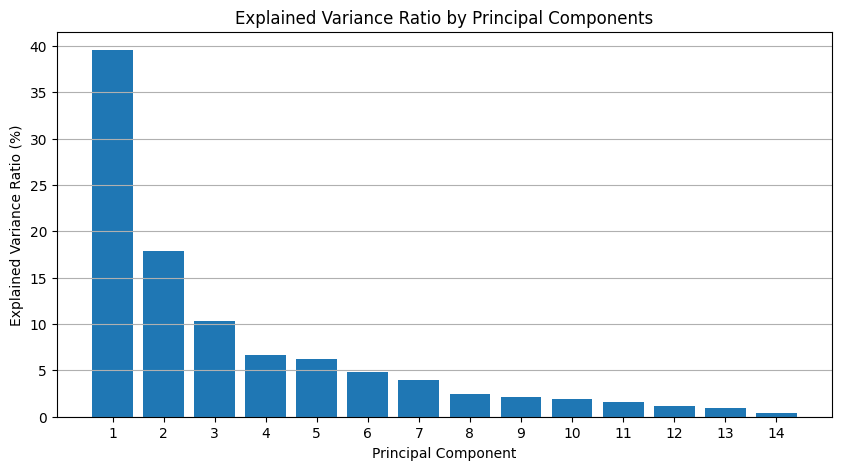

In [6]:
_, eigenvalues = my_PCA(wine_df, n_components=13)
percents = eigenvalues / np.sum(eigenvalues) * 100
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(percents) + 1), percents)
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio (%)')
plt.xticks(range(1, len(percents) + 1))
plt.grid(axis='y')
plt.show()


# 

## Task 2

Let's perform PCA on the USArrests data set. The rows of the data set contain the 50 states, in
alphabetical order:

In [7]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [8]:
usa_arrests_df = pd.read_csv('usarrests.csv', index_col=0)
usa_arrests_df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


The columns of the data set contain four variables relating to various crimes:

In [9]:
usa_arrests_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Let’s start by taking a quick look at the column means of the data:


In [10]:
usa_arrests_df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

We see right away the the data have vastly di↵erent means. We can also examine the variances of the
four variables:

In [11]:
usa_arrests_df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Not surprisingly, the variables also have vastly different variances: the UrbanPop variable measures the
percentage of the population in each state living in an urban area, which is not a comparable number to the
number of crimes committeed in each state per 100,000 individuals. If we failed to scale the variables before
performing PCA, then most of the principal components that we observed would be driven by the Assault
variable, since it has by far the largest mean and variance.
Thus, it is important to standardize the variables to have mean zero and standard deviation 1 before
performing PCA. We can do this using the scale() function from sklearn:

Now we’ll use the PCA() function from sklearn to compute the loading vectors:


In [12]:
X = pd.DataFrame(scale(usa_arrests_df), index=usa_arrests_df.index, columns=usa_arrests_df.columns)
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=usa_arrests_df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,-0.418181,-0.341233,-0.649228
Assault,0.583184,-0.187986,-0.268148,0.743407
UrbanPop,0.278191,0.872806,-0.378016,-0.133878
Rape,0.543432,0.167319,0.817778,-0.089024


We see that there are four distinct principal components. This is to be expected because there are in
general min(n  1, p) informative principal components in a data set with n observations and p variables.
Using the fittransform() function, we can get the principal component scores of the original data. We’ll
take a look at the first few states:


In [13]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=usa_arrests_df.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,-1.133392,-0.444269,-0.156267
Alaska,1.950138,-1.073213,2.040003,0.438583
Arizona,1.763164,0.745957,0.054781,0.834653
Arkansas,-0.141420,-1.119797,0.114574,0.182811
California,2.523980,1.542934,0.598557,0.341996


We see that there are four distinct principal components. This is to be expected because there are in
general min(n  1, p) informative principal components in a data set with n observations and p variables.
Using the fittransform() function, we can get the principal component scores of the original data. We’ll
take a look at the first few states:

We can construct a biplot of the first two principal components using our loading vectors:


/var/folders/k0/15h5fjq5207_r4s2mhs7dsdw0000gn/T/ipykernel_67809/2742763683.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
/var/folders/k0/15h5fjq5207_r4s2mhs7dsdw0000gn/T/ipykernel_67809/2742763683.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
/var/folders/k0/15h5fjq5207_r4s2mhs7dsdw0000gn/T/ipykernel_67809/2742763683.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

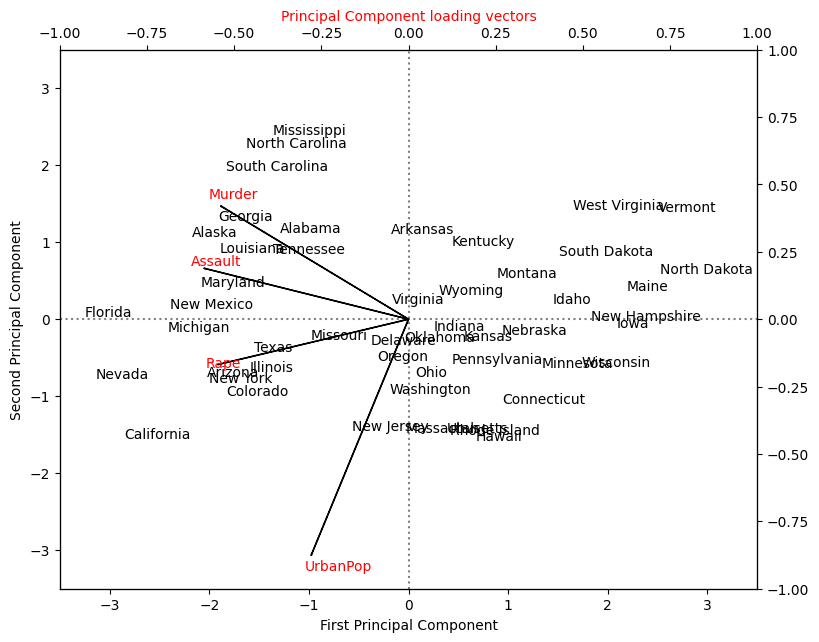

In [14]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and t
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])
plt.show()

The PCA() function also outputs the variance explained by of each principal component. We can access
these values as follows:

In [15]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

We can also get the proportion of variance explained:


In [16]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

We see that the first principal component explains 62.0% of the variance in the data, the next principal
component explains 24.7% of the variance, and so forth. We can plot the PVE explained by each component
as follows:

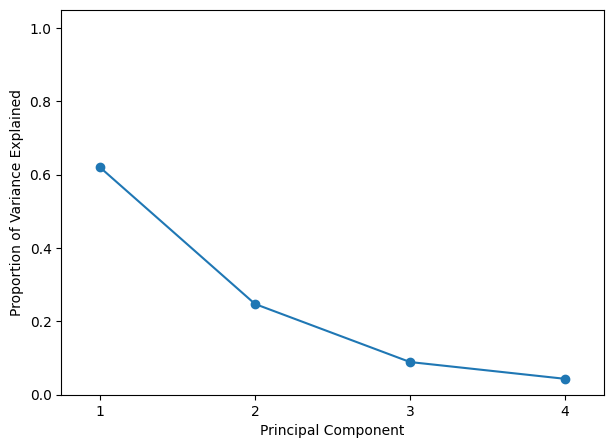

In [17]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

We can also use the function cumsum(), which computes the cumulative sum of the elements of a numeric
vector, to plot the cumulative PVE:

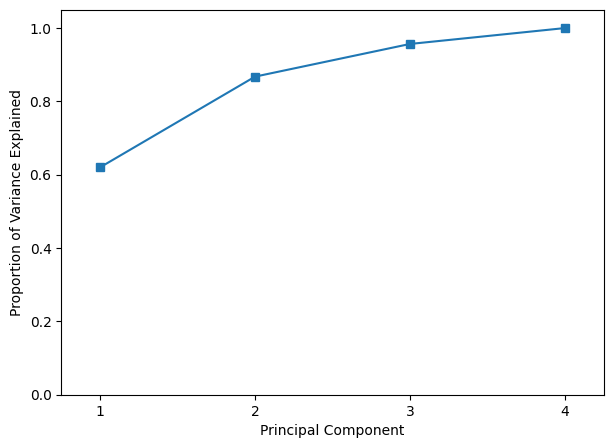

In [18]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

### NCI60 Data Example
NCI60 is cancer cell line microarray data, which consists of 6,830 gene expression measurements on 64 cancer cell lines.

In [19]:
df2 = pd.read_csv('NCI60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [20]:
y = pd.read_csv('NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])

### PCA on the NCI60 Data


We first perform PCA on the data after scaling the variables (genes) to have standard deviation one, although
one could reasonably argue that it is better not to scale the genes:

In [21]:
# Scale the data
X = pd.DataFrame(scale(df2))
X.shape
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

We now plot the first few principal component score vectors, in order to visualize the data. The observations (cell lines) corresponding to a given cancer type will be plotted in the same color, so that we can see
to what extent the observations within a cancer type are similar to each other:

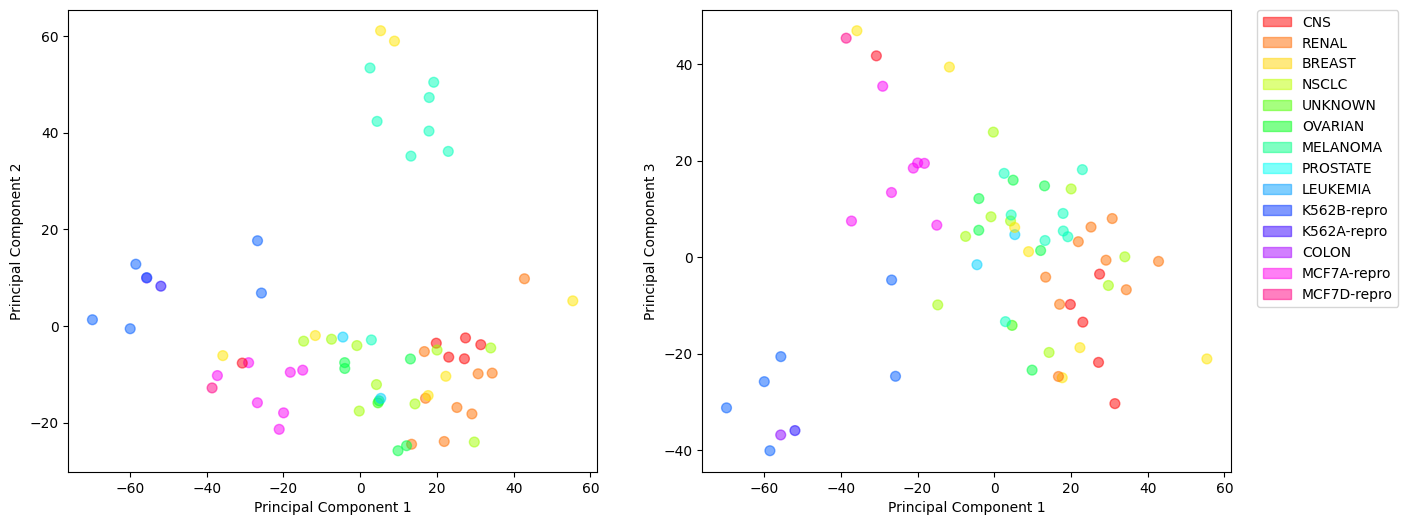

In [22]:
import matplotlib as mpl

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv
# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')
# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')
# Custom legend for the classes (y) since we do not create scatter plots per class (which could
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)
for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))
ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')

On the whole, cell lines corresponding to a single cancer type do tend to have similar values on the first
few principal component score vectors. This indicates that cell lines from the same cancer type tend to have
pretty similar gene expression levels.
We can generate a summary of the proportion of variance explained (PVE) of the first few principal
components:

In [23]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),
pca2.explained_variance_ratio_[:5],
np.cumsum(pca2.explained_variance_ratio_[:5])],
index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Using the plot() function, we can also plot the variance explained by the first few principal components:


Text(0, 0.5, 'Variances')

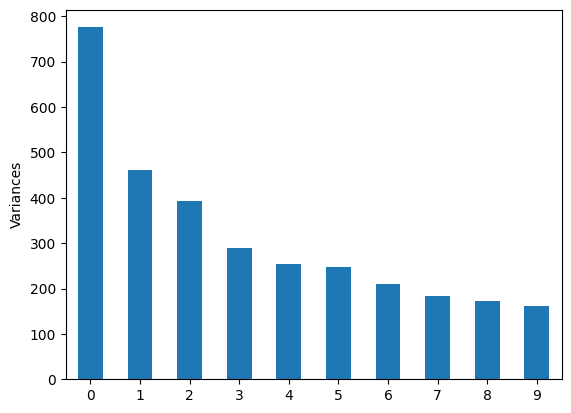

In [24]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

However, it is generally more informative to plot the PVE of each principal component (i.e. a scree plot)
and the cumulative PVE of each principal component. This can be done with just a little tweaking:

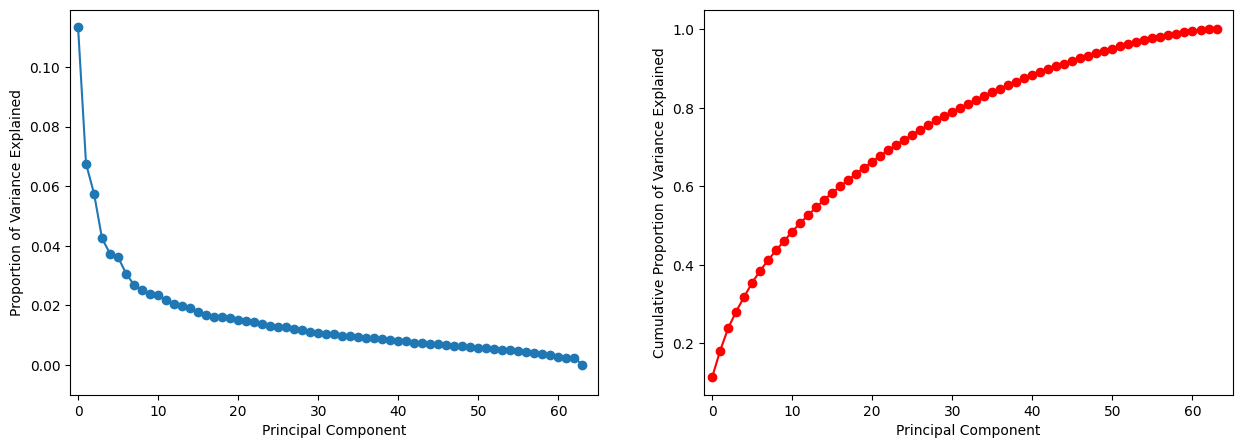

In [25]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)
# Right plot

ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)
for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)